# Problem Statement 

1. Print an error message
    1. If the length of the string exceeds 100
    2. If the string is not provided
    3. If all the letters in the string are repeated exactly once
    4. If there is no second most frequent character
2. Else print the second most frequent character in the string

# Test Cases

1. If there is no second most frequent character <br>
Input = aaaccc <br>
Ouput = There is no second most frequent character

2. If all the letters in the string repeat exactly once<br>
Input = abcd <br>
Ouput = All the letters in the string are repeated exactly once

3. If length of the string is greater than 100 <br>
Output = The length of the string exceeds 100

4. If the length of the string is 100 and all the characters are same
Output = There is no second most frequent character

5. If the string is not provided <br>
Input =
Output = The string has not been provided

6. If there are two or more characters for 1st most frequent character <br>
Input = aaacccbb <br>
Output: b

7. If there are two or more characters for 2nd most frequent character, display the character that comes first when alphabetically ordered <br>
Input = aaaccbb <br>
Output = b

8. If there is only 1 occurence of the second most frequent character <br>
Input = aaac <br>
Output = c

# Algorithm

1. Define a method getSecondMostFreq passing the input string and do the following:
    1. Return Error code 'err1' and 'The length of the string exceeds 100' if so
    2. Return Error code 'err2' and 'The string has not been provided' if so
    3. Get the number of unique characters using set method and match it with the length of the string, if both are same, then return the error code 'err3' and 'All the letters in the string are repeated exactly once'.
    4. Initialize freq_lst list of 256 size with value 0. The index position of this list respresents an ASCII code. 
    5. Count number of occurrences of every character using for loop and save it in the list on the index representing the ASCII code of the character.
    6. If there is only 1 unique frequency greater than 0, then return the error code 'err4' and the string 'There is no second most frequent character'. 
    7. Have 2 variables first_freq_ascii_idx and second_freq_ascii_idx initialized as 0, pointing to the index position 0 in the list freq_lst
    8. Traversing through each element in the list, do the following:
        1. If the current element in the list is greater than the value at first_freq_ascii_idx, assign second_freq_ascii_idx = first_freq_ascii_idx & first_freq_ascii_idx = cur_ele_ascii_indx
        2. Else if current element greater than the element at second_freq_ascii_idx and is also not equal to the element at first_freq_ascii_idx, assign second_freq_ascii_idx = cur_ele_ascii_indx
    9. Return output code 'output', and the character representation of second_freq_ascii_idx which gives the second most frequent character.
2. Get the input string from the user
3. Call the function getSecondMostFreq passing the input string as parameter and save the return values into result_type and result
4. If the result_type begins with 'err', print the result, else print The second most frequent character is 'value of result variable'

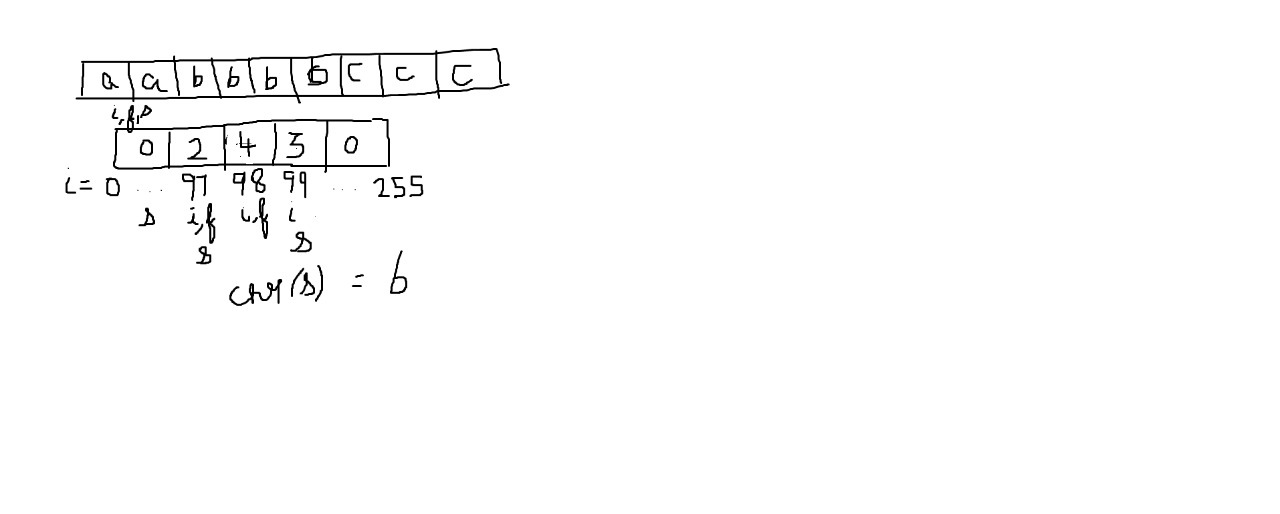

# Implementation

In [34]:
def getSecondMostFreq(string):
    if len(string)>100:
        return 'err1','The length of the string exceeds 100'
     
    if len(string)==0:
        return 'err2','The string has not been provided'
    
    # check if all the characters in the string are repeated exactly once
    unique_characters = len(set(list(string)))
    if unique_characters == len(string):
        return 'err3','All the letters in the string are repeated exactly once'
    
    # Initialize freq_lst list of 256 size with value 0
    freq_lst = [0] * 256
    
     # count number of occurrences of every character.
    for i in range(len(string)):
        freq_lst[ord(string[i])] += 1
        
    if len(list(set([x for x in freq_lst if x!=0])))==1:
        return 'err4','There is no second most frequent character'
    
#     for ind, val in enumerate(freq_lst): # for testing purpose
#         if val !=0:
#             print(ind,'-', chr(ind), '-', val, end='\t')
        
    first_freq_ascii_idx, second_freq_ascii_idx = 0, 0 
    
    # Traverse through the count[] and find second highest element.
    for cur_ele_ascii_indx in range(256):
        second_greater_cond = freq_lst[cur_ele_ascii_indx] > freq_lst[second_freq_ascii_idx]
        
        # If current element is greater than first then update second = first and first = current element
        if freq_lst[cur_ele_ascii_indx] > freq_lst[first_freq_ascii_idx]:
            second_freq_ascii_idx = first_freq_ascii_idx
            first_freq_ascii_idx = cur_ele_ascii_indx
            
        # If current element is in between first and second then update second = current element
        elif ( second_greater_cond and freq_lst[cur_ele_ascii_indx] != freq_lst[first_freq_ascii_idx]): 
            second_freq_ascii_idx = cur_ele_ascii_indx
            
    return 'output',chr(second_freq_ascii_idx)

# Get the input from user
string = input('Enter the string: ')

# call the function
result_type, result = getSecondMostFreq(string)

# display the output
if result_type.startswith('err'):
    print('\n', result)
else:
    print("\n The second most frequent character is", result)

Enter the string:  aaaaaaaaaaaaaa



 There is no second most frequent character


# Testing

In [35]:
inputs = ['aaaccc', 'abcd', 'a'*101, 'a'*100,'','aaacccbb','aaaccbb','aaac']
outputs = ['There is no second most frequent character', 'All the letters in the string are repeated exactly once', 'The length of the string exceeds 100', 
           'There is no second most frequent character', 'The string has not been provided','b', 'b', 'c']

def test(inputs, outputs):
    test_result = []
    generated_outputs = []
    for input_str,output in zip(inputs,outputs):
        _,func_output = getSecondMostFreq(input_str)
        generated_outputs.append(func_output)
        
        if func_output == output:
            test_result.append('Pass')
        else:
            test_result.append('Fail')
    if test_result.count('Pass')==len(test_result):
        print('All {} test cases passed successfully. Yeehhhhh!'.format(len(test_result)))
    else:
        print(test_result.count('Fail'), 'Test cases failed.')
        failed_tc_indexes = [index for index, element in enumerate(test_result) if element == 'Fail']
        print('The failed test cases are ', [x+1 for x in failed_tc_indexes])
        for failed_tc_index in failed_tc_indexes:
            print('Test Case ', failed_tc_index+1, ': ')
            print('Input: {}'.format(inputs[failed_tc_index]))
            print('Expected Output: {}'.format(outputs[failed_tc_index]))
            print('Generated Output: {}'.format(generated_outputs[failed_tc_index]))
                  
test(inputs,outputs)

All 8 test cases passed successfully. Yeehhhhh!
